# Netflix Data Analysis

## Introduction

In this analysis, we will be working with two datasets related to Netflix. Our goal is to analyze these datasets side by side to extract meaningful insights. The datasets are:

1. **Netflix Userbase**
2. **Netflix Titles**

### 1. Netflix Userbase

The `Netflix Userbase` dataset contains information about the users of Netflix. This dataset includes various attributes related to the users, such as their demographics, subscription details, and usage patterns. By analyzing this dataset, we aim to understand the user demographics, their subscription preferences, and their viewing habits.

### 2. Netflix Titles

The `Netflix Titles` dataset includes details about the content available on Netflix. This dataset provides information about the movies and TV shows, including their titles, genres, release dates, ratings, and more. By analyzing this dataset, we aim to understand the content library of Netflix, popular genres, and trends over time.


![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)

# Table of Contents

1. [Netflix Data Analysis](#netflix-data-analysis)
2. [Introduction](#introduction)
    - [1. Netflix Userbase](#1-netflix-userbase)
    - [2. Netflix Titles](#2-netflix-titles)
3. [Loading Datasets](#loading-datasets)
4. [Overview of Dataset](#overview-of-dataset)
5. [Correcting Data Type of Users Data](#correcting-data-type-of-users-data)
6. [Data Issues and Handling Strategies](#data-issues-and-handling-strategies)
    - [1. Empty Rows of Textual Data](#1-empty-rows-of-textual-data)
    - [2. Missing Values in Textual Data Columns](#2-missing-values-in-textual-data-columns)
    - [3. Release Year as Date Type](#3-release-year-as-date-type)
7. [Next Steps](#next-steps)
8. [Identify Missing Values](#identify-missing-values)
    - [NOTE: While Identifying](#note-while-identifying)
9. [Handling Missing Values](#handling-missing-values)
    - [Filling Missing Values with Dummy Values](#filling-missing-values-with-dummy-values)
    - [Except Dates for Two Reasons](#except-dates-for-two-reasons)
10. [Netflix Movies Analysis](#netflix-movies-analysis)
    - [This Year Analysis of Movies [Latest in Dataset]](#this-year-analysis-of-movies-latest-in-dataset)
11. [Netflix Users Analysis](#netflix-users-analysis)
    - [This Year User Analysis [Latest]](#this-year-user-analysis-latest)


![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)

### Loading Datasets 

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [4]:
netflix_users_df = pd.read_csv('NetflixUserbase.csv', index_col='User ID')

In [7]:
netflix_users_df.head(5)

,Subscription Type,Monthly Revenue,Join Date,Last Payment Date,Country,Age,Gender,Device,Plan Duration
User ID,,,,,,,,,
1,Basic,10,15-01-22,10-06-23,United States,28,Male,Smartphone,1 Month
2,Premium,15,05-09-21,22-06-23,Canada,35,Female,Tablet,1 Month
3,Standard,12,28-02-23,27-06-23,United Kingdom,42,Male,Smart TV,1 Month
4,Standard,12,10-07-22,26-06-23,Australia,51,Female,Laptop,1 Month
5,Basic,10,01-05-23,28-06-23,Germany,33,Male,Smartphone,1 Month


In [7]:
netflix_movies_df = pd.read_csv('netflixTitles.csv', index_col='show_id')

In [164]:
netflix_movies_df.head(5)

,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
show_id,,,,,,,,,,,
s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


<div class='alert alert-block alert-success'>
    <b>Success</b>: This box indicates a successful action.


![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)




### Overview of Dataset

netflix_users

In [91]:
duplicate_count = netflix_users_df.duplicated(keep=False).sum()
duplicate_count

0

In [34]:
netflix_users_df.info()
netflix_users_df.describe()

<class 'pandas.core.frame.DataFrame'>
Index: 2500 entries, 1 to 2500
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Subscription Type  2500 non-null   object
 1   Monthly Revenue    2500 non-null   int64 
 2   Join Date          2500 non-null   object
 3   Last Payment Date  2500 non-null   object
 4   Country            2500 non-null   object
 5   Age                2500 non-null   int64 
 6   Gender             2500 non-null   object
 7   Device             2500 non-null   object
 8   Plan Duration      2500 non-null   object
dtypes: int64(2), object(7)
memory usage: 195.3+ KB


,Monthly Revenue,Age
count,2500.000000,2500.000000
mean,12.508400,38.795600
std,1.686851,7.171778
min,10.000000,26.000000
25%,11.000000,32.000000
50%,12.000000,39.000000
75%,14.000000,45.000000
max,15.000000,51.000000


![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)

### Correcting Data type of Users Data**

In [9]:
netflix_users_df['Join Date'] = pd.to_datetime(netflix_users_df['Join Date'], format='%d-%m-%y', errors='coerce')
netflix_users_df['Last Payment Date'] = pd.to_datetime(netflix_users_df['Last Payment Date'], format='%d-%m-%y', errors='coerce')

In [11]:
netflix_users_df.head(2)

,Subscription Type,Monthly Revenue,Join Date,Last Payment Date,Country,Age,Gender,Device,Plan Duration
User ID,,,,,,,,,
1,Basic,10,2022-01-15,2023-06-10,United States,28,Male,Smartphone,1 Month
2,Premium,15,2021-09-05,2023-06-22,Canada,35,Female,Tablet,1 Month


**This dataset seems ok!, because no empty rows, Dtype is right now, age max min is not outliers, will make box pplot for verification**

![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)

netflix_movies

In [99]:
duplicate_count = netflix_movies_df.duplicated(keep = False).sum()
duplicate_count

0

In [36]:
netflix_movies_df.info()
netflix_movies_df.describe()

<class 'pandas.core.frame.DataFrame'>
Index: 8807 entries, s1 to s8807
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   type          8807 non-null   object
 1   title         8807 non-null   object
 2   director      6173 non-null   object
 3   cast          7982 non-null   object
 4   country       7976 non-null   object
 5   date_added    8797 non-null   object
 6   release_year  8807 non-null   int64 
 7   rating        8803 non-null   object
 8   duration      8804 non-null   object
 9   listed_in     8807 non-null   object
 10  description   8807 non-null   object
dtypes: int64(1), object(10)
memory usage: 825.7+ KB


,release_year
count,8807.000000
mean,2014.180198
std,8.819312
min,1925.000000
25%,2013.000000
50%,2017.000000
75%,2019.000000
max,2021.000000


## Data Issues and Handling Strategies

### 1. Empty Rows of Textual Data
- **Issues**: Columns like `director` and `country` have many missing values.
- **Strategy**: fill this values with strings like 'not added'

### 2. Missing Values in Textual Data Columns
- **Issues**: Columns like `rating` and `duration` have some missing values.
- **Strategy**: 
  - **Rating**: Fill with the most frequent value or 'Unknown'.
  - **Duration**: Impute with the average duration for movies and TV shows.

### 3. Release Year as Date Type
- **Issues**: release_year, 'date added', 'releae_date' is not in date format.
- **Strategy**: Convert to datetime format for better chronological analysis.

### Next Steps
1. **Identify Missing Values**: Quantify missing values in each column.
2. **Implement Strategies**: Apply handling strategies and convert data types.
3. **Verify Data Integrity**: Ensure data cleaning maintains data relevance.

![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)

### **Identify Missing Values**:

In [47]:
netflix_movies_df[netflix_movies_df['rating'].isna()]

,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
show_id,,,,,,,,,,,
s5990,Movie,13TH: A Conversation with Oprah Winfrey & Ava ...,NaN,"Oprah Winfrey, Ava DuVernay",NaN,"January 26, 2017",2017,NaN,37 min,Movies,Oprah Winfrey sits down with director Ava DuVe...
s6828,TV Show,Gargantia on the Verdurous Planet,NaN,"Kaito Ishikawa, Hisako Kanemoto, Ai Kayano, Ka...",Japan,"December 1, 2016",2013,NaN,1 Season,"Anime Series, International TV Shows","After falling through a wormhole, a space-dwel..."
s7313,TV Show,Little Lunch,NaN,"Flynn Curry, Olivia Deeble, Madison Lu, Oisín ...",Australia,"February 1, 2018",2015,NaN,1 Season,"Kids' TV, TV Comedies","Adopting a child's perspective, this show take..."
s7538,Movie,My Honor Was Loyalty,Alessandro Pepe,"Leone Frisa, Paolo Vaccarino, Francesco Miglio...",Italy,"March 1, 2017",2015,NaN,115 min,Dramas,"Amid the chaos and horror of World War II, a c..."


In [53]:
netflix_movies_df[netflix_movies_df['duration'].isna()]

,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
show_id,,,,,,,,,,,
s5542,Movie,Louis C.K. 2017,Louis C.K.,Louis C.K.,United States,"April 4, 2017",2017,74 min,NaN,Movies,"Louis C.K. muses on religion, eternal love, gi..."
s5795,Movie,Louis C.K.: Hilarious,Louis C.K.,Louis C.K.,United States,"September 16, 2016",2010,84 min,NaN,Movies,Emmy-winning comedy writer Louis C.K. brings h...
s5814,Movie,Louis C.K.: Live at the Comedy Store,Louis C.K.,Louis C.K.,United States,"August 15, 2016",2015,66 min,NaN,Movies,The comic puts his trademark hilarious/thought...


#### NOTE: while indentifying
> we come to figure that where duration is null in this records human error exists because instead of adding duration, mistenkly
added in the rating with date of duration

![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)

### Handling Missing Values

In [13]:
missing_duration_mask = netflix_movies_df['duration'].isna()

netflix_movies_df.loc[missing_duration_mask, 'duration'] = netflix_movies_df.loc[missing_duration_mask, 'rating']

In [15]:
missing_duration_mask[missing_duration_mask]

show_id
s5542    True
s5795    True
s5814    True
Name: duration, dtype: bool

In [17]:
netflix_movies_df.loc[missing_duration_mask, 'rating'] = np.nan

In [19]:
netflix_movies_df[netflix_movies_df['rating'].isna()]

,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
show_id,,,,,,,,,,,
s5542,Movie,Louis C.K. 2017,Louis C.K.,Louis C.K.,United States,"April 4, 2017",2017,NaN,74 min,Movies,"Louis C.K. muses on religion, eternal love, gi..."
s5795,Movie,Louis C.K.: Hilarious,Louis C.K.,Louis C.K.,United States,"September 16, 2016",2010,NaN,84 min,Movies,Emmy-winning comedy writer Louis C.K. brings h...
s5814,Movie,Louis C.K.: Live at the Comedy Store,Louis C.K.,Louis C.K.,United States,"August 15, 2016",2015,NaN,66 min,Movies,The comic puts his trademark hilarious/thought...
s5990,Movie,13TH: A Conversation with Oprah Winfrey & Ava ...,NaN,"Oprah Winfrey, Ava DuVernay",NaN,"January 26, 2017",2017,NaN,37 min,Movies,Oprah Winfrey sits down with director Ava DuVe...
s6828,TV Show,Gargantia on the Verdurous Planet,NaN,"Kaito Ishikawa, Hisako Kanemoto, Ai Kayano, Ka...",Japan,"December 1, 2016",2013,NaN,1 Season,"Anime Series, International TV Shows","After falling through a wormhole, a space-dwel..."
s7313,TV Show,Little Lunch,NaN,"Flynn Curry, Olivia Deeble, Madison Lu, Oisín ...",Australia,"February 1, 2018",2015,NaN,1 Season,"Kids' TV, TV Comedies","Adopting a child's perspective, this show take..."
s7538,Movie,My Honor Was Loyalty,Alessandro Pepe,"Leone Frisa, Paolo Vaccarino, Francesco Miglio...",Italy,"March 1, 2017",2015,NaN,115 min,Dramas,"Amid the chaos and horror of World War II, a c..."


**handled human error**

![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)

### Filling Missing Values with dummy Values

**while handling these data duration null values has been removed, or replacing of null values of rated with** "not rated"

In [21]:
netflix_movies_df.loc[netflix_movies_df['rating'].isna(), 'rating'] = 'Not Rated'

In [178]:
netflix_movies_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8807 entries, s1 to s8807
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   type          8807 non-null   object
 1   title         8807 non-null   object
 2   director      6173 non-null   object
 3   cast          7982 non-null   object
 4   country       7976 non-null   object
 5   date_added    8797 non-null   object
 6   release_year  8807 non-null   int64 
 7   rating        8807 non-null   object
 8   duration      8807 non-null   object
 9   listed_in     8807 non-null   object
 10  description   8807 non-null   object
dtypes: int64(1), object(10)
memory usage: 825.7+ KB


**Adding values null values of director with not added**

In [23]:
netflix_movies_df.loc[netflix_movies_df['director'].isna(), 'director'] = 'Not Added'

In [182]:
netflix_movies_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8807 entries, s1 to s8807
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   type          8807 non-null   object
 1   title         8807 non-null   object
 2   director      8807 non-null   object
 3   cast          7982 non-null   object
 4   country       7976 non-null   object
 5   date_added    8797 non-null   object
 6   release_year  8807 non-null   int64 
 7   rating        8807 non-null   object
 8   duration      8807 non-null   object
 9   listed_in     8807 non-null   object
 10  description   8807 non-null   object
dtypes: int64(1), object(10)
memory usage: 825.7+ KB


In [25]:
netflix_movies_df.loc[netflix_movies_df['cast'].isna(), 'cast'] = 'Not Added'

In [27]:
netflix_movies_df.loc[netflix_movies_df['country'].isna(), 'country'] = 'Not Added'

**Replacing all other values too, by "not Added'**

In [192]:
netflix_movies_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8807 entries, s1 to s8807
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   type          8807 non-null   object
 1   title         8807 non-null   object
 2   director      8807 non-null   object
 3   cast          8807 non-null   object
 4   country       8807 non-null   object
 5   date_added    8797 non-null   object
 6   release_year  8807 non-null   int64 
 7   rating        8807 non-null   object
 8   duration      8807 non-null   object
 9   listed_in     8807 non-null   object
 10  description   8807 non-null   object
dtypes: int64(1), object(10)
memory usage: 825.7+ KB


![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)

#### **except Dates for two reasons**
1. it is not text data
2. we have to find average so, we will put values accordingly

but we have to change data type of all data in the right types

**null values**

In [29]:
netflix_movies_df[netflix_movies_df['date_added'].isna()]

,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
show_id,,,,,,,,,,,
s6067,TV Show,A Young Doctor's Notebook and Other Stories,Not Added,"Daniel Radcliffe, Jon Hamm, Adam Godley, Chris...",United Kingdom,NaN,2013,TV-MA,2 Seasons,"British TV Shows, TV Comedies, TV Dramas","Set during the Russian Revolution, this comic ..."
s6175,TV Show,Anthony Bourdain: Parts Unknown,Not Added,Anthony Bourdain,United States,NaN,2018,TV-PG,5 Seasons,Docuseries,This CNN original series has chef Anthony Bour...
s6796,TV Show,Frasier,Not Added,"Kelsey Grammer, Jane Leeves, David Hyde Pierce...",United States,NaN,2003,TV-PG,11 Seasons,"Classic & Cult TV, TV Comedies",Frasier Crane is a snooty but lovable Seattle ...
s6807,TV Show,Friends,Not Added,"Jennifer Aniston, Courteney Cox, Lisa Kudrow, ...",United States,NaN,2003,TV-14,10 Seasons,"Classic & Cult TV, TV Comedies",This hit sitcom follows the merry misadventure...
s6902,TV Show,Gunslinger Girl,Not Added,"Yuuka Nanri, Kanako Mitsuhashi, Eri Sendai, Am...",Japan,NaN,2008,TV-14,2 Seasons,"Anime Series, Crime TV Shows","On the surface, the Social Welfare Agency appe..."
s7197,TV Show,Kikoriki,Not Added,Igor Dmitriev,Not Added,NaN,2010,TV-Y,2 Seasons,Kids' TV,A wacky rabbit and his gang of animal pals hav...
s7255,TV Show,La Familia P. Luche,Not Added,"Eugenio Derbez, Consuelo Duval, Luis Manuel Áv...",United States,NaN,2012,TV-14,3 Seasons,"International TV Shows, Spanish-Language TV Sh...","This irreverent sitcom featues Ludovico, Feder..."
s7407,TV Show,Maron,Not Added,"Marc Maron, Judd Hirsch, Josh Brener, Nora Zeh...",United States,NaN,2016,TV-MA,4 Seasons,TV Comedies,"Marc Maron stars as Marc Maron, who interviews..."
s7848,TV Show,Red vs. Blue,Not Added,"Burnie Burns, Jason Saldaña, Gustavo Sorola, G...",United States,NaN,2015,NR,13 Seasons,"TV Action & Adventure, TV Comedies, TV Sci-Fi ...","This parody of first-person shooter games, mil..."


changing data types before adding values for missing values

In [31]:
netflix_movies_df['release_year'] = pd.to_datetime(netflix_movies_df['release_year'], format='%Y', errors='coerce')

netflix_movies_df['date_added'] = pd.to_datetime(netflix_movies_df['date_added'], errors='coerce')


In [75]:
netflix_movies_df.head(3)

,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
show_id,,,,,,,,,,,
s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,Not Added,United States,2021-09-25,2020-01-01,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
s2,TV Show,Blood & Water,Not Added,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24,2021-01-01,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",Not Added,2021-09-24,2021-01-01,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...


In [33]:
avg_dateofAdded = netflix_movies_df['date_added'].mean()
avg_dateofAdded

Timestamp('2019-05-23 01:45:29.452290816')

In [35]:
netflix_movies_df.loc[netflix_movies_df['date_added'].isna(), 'date_added'] = avg_dateofAdded

checking by extracting one record who have not added date

In [37]:
netflix_movies_df.loc['s6067']

type                                                      TV Show
title                 A Young Doctor's Notebook and Other Stories
director                                                Not Added
cast            Daniel Radcliffe, Jon Hamm, Adam Godley, Chris...
country                                            United Kingdom
date_added                          2019-05-23 01:45:29.452290816
release_year                                  2013-01-01 00:00:00
rating                                                      TV-MA
duration                                                2 Seasons
listed_in                British TV Shows, TV Comedies, TV Dramas
description     Set during the Russian Revolution, this comic ...
Name: s6067, dtype: object

**checking is there any null values?**

In [226]:
netflix_movies_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8807 entries, s1 to s8807
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   type          8807 non-null   object        
 1   title         8807 non-null   object        
 2   director      8807 non-null   object        
 3   cast          8807 non-null   object        
 4   country       8807 non-null   object        
 5   date_added    8807 non-null   datetime64[ns]
 6   release_year  8807 non-null   datetime64[ns]
 7   rating        8807 non-null   object        
 8   duration      8807 non-null   object        
 9   listed_in     8807 non-null   object        
 10  description   8807 non-null   object        
dtypes: datetime64[ns](2), object(9)
memory usage: 1.1+ MB


**data is clean now an ready to work for further analysis**

![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)

---

### Netflix Movies Analysis

**Basic Analysis:**

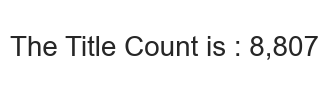

In [416]:
titleCount = netflix_movies_df['title'].count()

fig, ax = plt.subplots(figsize=(1,1))

# Hide the axes
ax.axis('off')

# Display the total discounted price as a large text
ax.text(0.5, 0.5, f'The Title Count is : {titleCount:,}', 
        fontsize=20, ha='center', va='center')

plt.show()

**what type of movies have, what movies have highest count?**

In [65]:
sns.set_style('whitegrid')
typeofMovies = netflix_movies_df.groupby('type')['title'].count()
typeofMovies

type
Movie      6131
TV Show    2676
Name: title, dtype: int64

Text(0.5, 1.0, 'Type count')

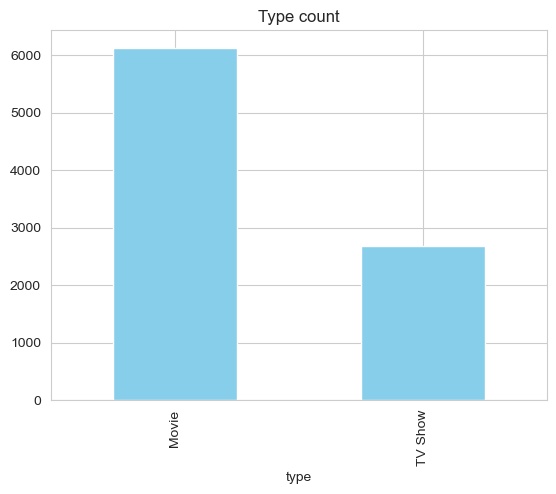

In [125]:
typeofMovies.plot(kind = 'bar', color='skyblue')
plt.title('Type count')

**what type of rating have, what rating movies have highest count?**

In [129]:
rating_movie_count = netflix_movies_df.groupby('rating')['title'].count()
rating_movie_count

rating
G              41
NC-17           3
NR             80
Not Rated       7
PG            287
PG-13         490
R             799
TV-14        2160
TV-G          220
TV-MA        3207
TV-PG         863
TV-Y          307
TV-Y7         334
TV-Y7-FV        6
UR              3
Name: title, dtype: int64

Text(0.5, 1.0, 'count Films base on ratings')

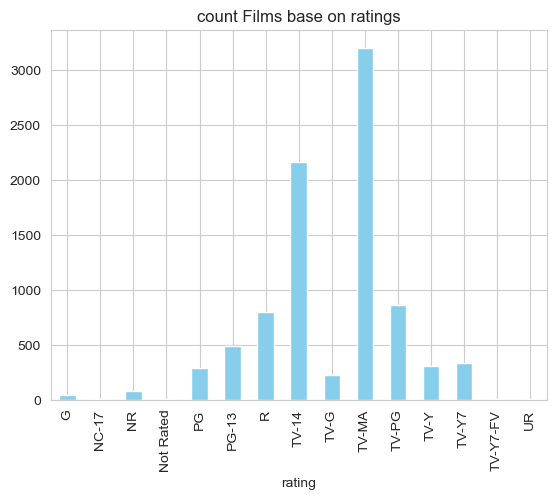

In [131]:
rating_movie_count.plot(kind = 'bar', color = 'skyblue')
plt.title('count Films base on ratings')

**Deep Analysis:**

**what year has more movies added the most?**

**first what are outliers**

<Axes: ylabel='year_added'>

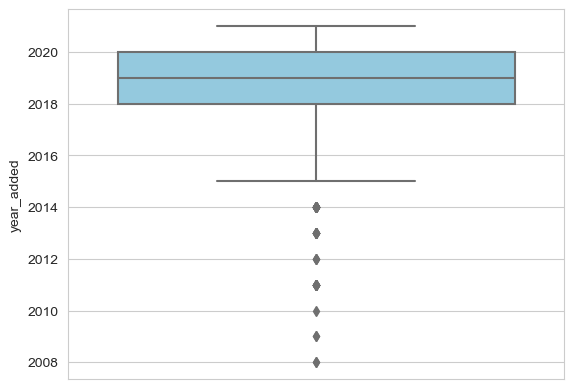

In [153]:
sns.boxplot(y=netflix_movies_df['year_added'], color='skyblue')

**what years movies added count**

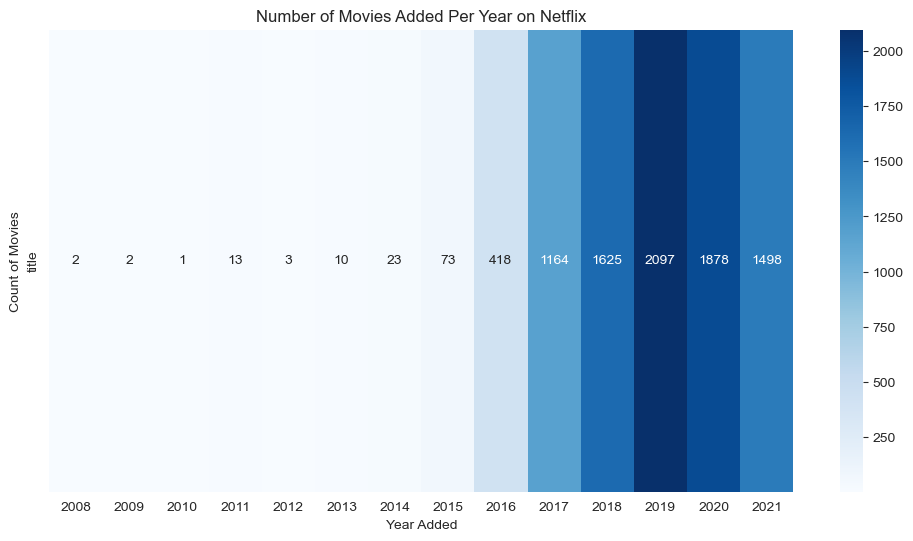

In [159]:
netflix_movies_df['year_added'] = netflix_movies_df['date_added'].dt.year

year_movie_count = netflix_movies_df.groupby('year_added')['title'].count().reset_index()

# Step 3: Pivot the DataFrame for heatmap
year_movie_count_pivot = year_movie_count.set_index('year_added').T

# Step 4: Plot the heatmap
plt.figure(figsize=(12, 6))
sns.heatmap(year_movie_count_pivot, annot=True, fmt="d", cmap="Blues", cbar=True)
plt.title('Number of Movies Added Per Year on Netflix')
plt.xlabel('Year Added')
plt.ylabel('Count of Movies')
plt.show()


**what will be the month with most movies added?**

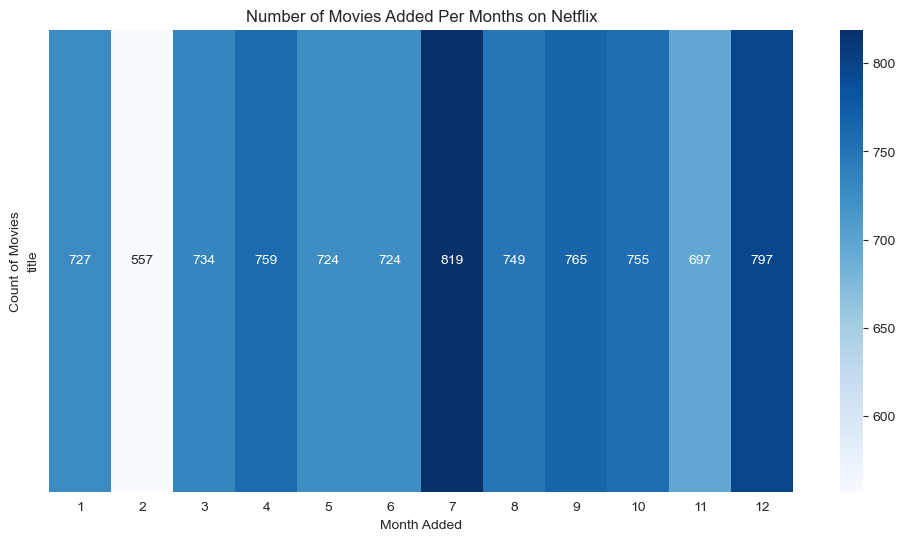

In [95]:
netflix_movies_df['months_added'] = netflix_movies_df['date_added'].dt.month

month_movie_count = netflix_movies_df.groupby('months_added')['title'].count().reset_index()

# Step 3: Pivot the DataFrame for heatmap
month_movie_count_pivot = month_movie_count.set_index('months_added').T

# Step 4: Plot the heatmap
plt.figure(figsize=(12, 6))
sns.heatmap(month_movie_count_pivot, annot=True, fmt="d", cmap="Blues", cbar=True)
plt.title('Number of Movies Added Per Months on Netflix')
plt.xlabel('Month Added')
plt.ylabel('Count of Movies')
plt.show()

**This shows movies adding in every month except february**

In [145]:
netflix_movies_df['duration'] = (netflix_movies_df['date_added'].dt.year - netflix_movies_df['release_year'].dt.year)

In [147]:
netflix_movies_df['duration'].describe()

count    8807.000000
mean        4.708981
std         8.785874
min        -3.000000
25%         0.000000
50%         1.000000
75%         5.000000
max        93.000000
Name: duration, dtype: float64

**here min is in negative because we added assumption of date_added that is before than release year so that is why it shows negative**

![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)


#### **This year Analysis of Movies [latest in dataset]**

In [129]:
filtered_df = netflix_movies_df[(netflix_movies_df['date_added'] >= '2021-01-01') & (netflix_movies_df['date_added'] <= '2022-01-01')]

**Sliced the Data 2021:2022**

In [69]:
filtered_countType_df = filtered_df.groupby('type')['title'].count()
filtered_countType_df

type
Movie      993
TV Show    505
Name: title, dtype: int64

<Axes: xlabel='type'>

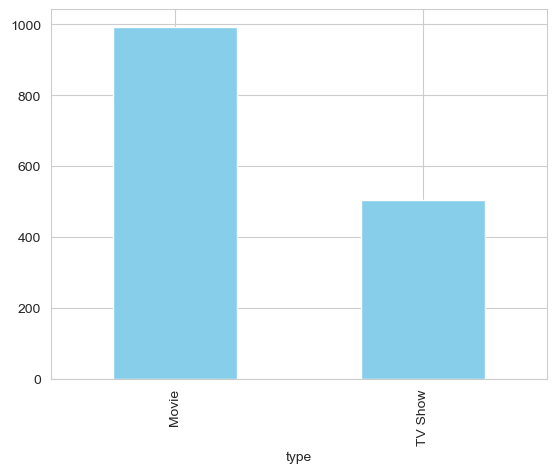

In [71]:
filtered_countType_df.plot(kind = 'bar', color='skyblue')

In [75]:
filtered_countRating_df = filtered_df.groupby('rating')['title'].count()
filtered_countRating_df

rating
G          4
PG        58
PG-13    146
R        190
TV-14    326
TV-G      44
TV-MA    489
TV-PG     97
TV-Y      57
TV-Y7     87
Name: title, dtype: int64

Text(0.5, 1.0, 'This year movies count added in months')

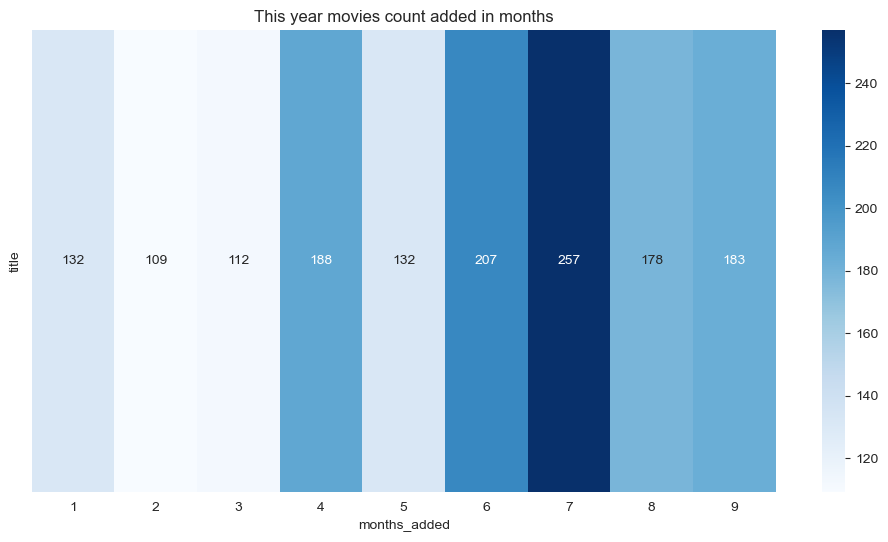

In [93]:
plt.figure(figsize=(12,6))
filtered_monthlyRevenueThisYEar = filtered_df.groupby('months_added')['title'].count().reset_index()

filtered_monthlyRevenueThisYEar_df = filtered_monthlyRevenueThisYEar.set_index('months_added').T

sns.heatmap(filtered_monthlyRevenueThisYEar_df, annot=True, fmt="d", cmap='Blues')
plt.title('This year movies count added in months')

**so most movies added in this year in june or july**

In [151]:
filtered_df['duration'].describe()

count    1498.000000
mean        5.750334
std         9.178211
min         0.000000
25%         0.000000
50%         1.000000
75%         8.000000
max        76.000000
Name: duration, dtype: float64

**this shows even this year many old movies also added, that is affecting average time period to added the movie**

<Axes: xlabel='duration'>

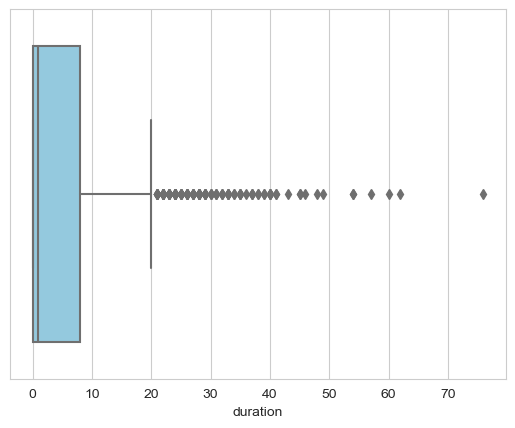

In [163]:
sns.boxplot(x=filtered_df['duration'], color='skyblue')

**this helps graphically helps us to understand that mostly movies added within year, the average timestamp of movie added is affective due to old movies added this year including older than 20 year or more old movies**

In [225]:
Q3 = filtered_df['duration'].quantile(0.75)
Q1 = filtered_df['duration'].quantile(0.25)

IQR = Q3 - Q1

upper_bound = Q3 + 1.5 * IQR
lower_bound = Q1 - 1.5 * IQR

In [255]:
outlirsDuration_df = filtered_df[filtered_df['duration'] >= upper_bound]
outlirsDuration_df.head(5)

,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,months_added
show_id,,,,,,,,,,,,
s8,Movie,Sankofa,Haile Gerima,"Kofi Ghanaba, Oyafunmike Ogunlano, Alexandra D...","United States, Ghana, Burkina Faso, United Kin...",2021-09-24,1993-01-01,TV-MA,28,"Dramas, Independent Movies, International Movies","On a photo shoot in Ghana, an American model s...",9
s23,Movie,Avvai Shanmughi,K.S. Ravikumar,"Kamal Hassan, Meena, Gemini Ganesan, Heera Raj...",Not Added,2021-09-21,1996-01-01,TV-PG,25,"Comedies, International Movies",Newly divorced and denied visitation rights wi...,9
s25,Movie,Jeans,S. Shankar,"Prashanth, Aishwarya Rai Bachchan, Sri Lakshmi...",India,2021-09-21,1998-01-01,TV-14,23,"Comedies, International Movies, Romantic Movies",When the father of the man she loves insists t...,9
s27,Movie,Minsara Kanavu,Rajiv Menon,"Arvind Swamy, Kajol, Prabhu Deva, Nassar, S.P....",Not Added,2021-09-21,1997-01-01,TV-PG,24,"Comedies, International Movies, Music & Musicals",A tangled love triangle ensues when a man fall...,9
s42,Movie,Jaws,Steven Spielberg,"Roy Scheider, Robert Shaw, Richard Dreyfuss, L...",United States,2021-09-16,1975-01-01,PG,46,"Action & Adventure, Classic Movies, Dramas",When an insatiable great white shark terrorize...,9


**so these are outliers let's move forward**

In [232]:
outlirsDuration_df['duration'].mean()

27.694267515923567

**this shows outliers average is 27 years to added the movie**

In [250]:
filtered_outliersDuration_df = (filtered_df[(filtered_df['duration'] <= upper_bound) & (filtered_df['duration'] >= lower_bound)])
filtered_outliersDuration_df['duration'].describe()

count    1381.000000
mean        3.636495
std         5.105093
min         0.000000
25%         0.000000
50%         1.000000
75%         6.000000
max        20.000000
Name: duration, dtype: float64

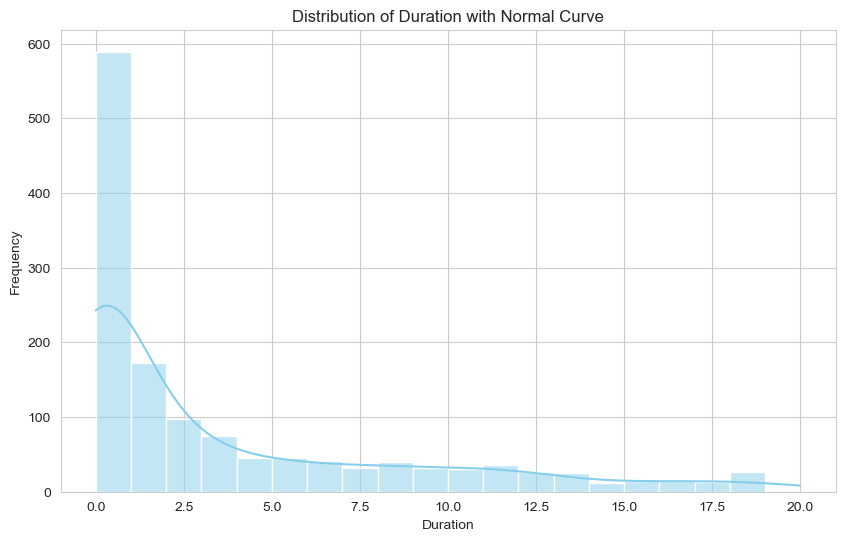

In [265]:
# Plotting the histogram with a density curve
plt.figure(figsize=(10, 6))
binsSize = np.arange(0, 20, 1)
sns.histplot(filtered_outliersDuration_df['duration'], kde=True, bins=binsSize , color='skyblue')

# Adding labels and title
plt.title('Distribution of Duration with Normal Curve')
plt.xlabel('Duration')
plt.ylabel('Frequency')

# Show the plot
plt.show()


**so now you can after removing outlier, average decreases so now movies added very quickly average also decrease to 3.6 years with less more outliers**
**and variation way less**
> and more than 500 films added within year

In [ ]:
# Calculate Q1 (25th percentile) and Q3 (75th percentile)
Q1 = emp_df['Salary'].quantile(0.25)
Q3 = emp_df['Salary'].quantile(0.75)

# Calculate IQR
IQR = Q3 - Q1


upper_bound = Q3 + 1.4 * IQR



![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)


---

### Netflix Users Analysis

In [395]:
netflix_users_df.head(5)

,Subscription Type,Monthly Revenue,Join Date,Last Payment Date,Country,Age,Gender,Device,Plan Duration
User ID,,,,,,,,,
1,Basic,10,2022-01-15,2023-06-10,United States,28,Male,Smartphone,1 Month
2,Premium,15,2021-09-05,2023-06-22,Canada,35,Female,Tablet,1 Month
3,Standard,12,2023-02-28,2023-06-27,United Kingdom,42,Male,Smart TV,1 Month
4,Standard,12,2022-07-10,2023-06-26,Australia,51,Female,Laptop,1 Month
5,Basic,10,2023-05-01,2023-06-28,Germany,33,Male,Smartphone,1 Month


**Basic Analysis:**

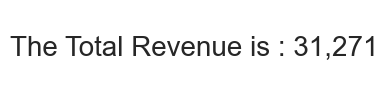

In [462]:
monthlyRevenueTotal = netflix_users_df['Monthly Revenue'].sum()
monthlyRevenueAvg = netflix_users_df['Monthly Revenue'].mean()
fig, ax = plt.subplots( figsize=(1,1))

# Hide the axes
ax.axis('off')

# Display the total discounted price as a large text
ax.text(0.5, 0.5, f'The Total Revenue is : {monthlyRevenueTotal:,}', 
        fontsize=20, ha='center', va='center')


plt.show()


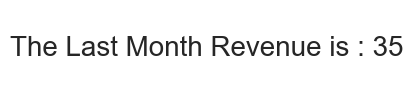

In [496]:
last_month = netflix_users_df['Join Date'].dt.to_period('M').max()

# Filter the DataFrame for the last month
last_month_df = netflix_users_df[netflix_users_df['Join Date'].dt.to_period('M') == last_month]
LMRevenue = last_month_df['Monthly Revenue'].sum()

fig, ax = plt.subplots( figsize=(1,1))

# Hide the axes
ax.axis('off')

# Display the total discounted price as a large text
ax.text(0.5, 0.5, f'The Last Month Revenue is : {LMRevenue :,}', 
        fontsize=20, ha='center', va='center')


plt.show()

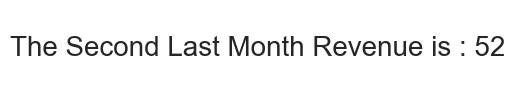

In [513]:
unique_months = netflix_users_df['Join Date'].dt.to_period('M').unique()
unique_months = sorted(unique_months, reverse=True)

# Get the second-to-last month
second_last_month = unique_months[1]
second_last_month

SecondLast_month_df = netflix_users_df[netflix_users_df['Join Date'].dt.to_period('M') == second_last_month]

SecondLastMR_month_df = SecondLast_month_df['Monthly Revenue'].sum()

fig, ax = plt.subplots( figsize=(1,1))

# Hide the axes
ax.axis('off')

# Display the total discounted price as a large text
ax.text(0.5, 0.5, f'The Second Last Month Revenue is : {SecondLastMR_month_df :,}', 
        fontsize=20, ha='center', va='center')


plt.show()

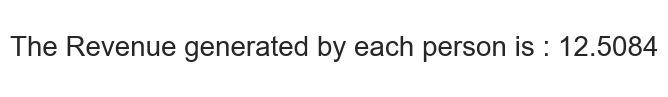

In [468]:
monthlyRevenueAvg = netflix_users_df['Monthly Revenue'].mean()
fig, ax = plt.subplots( figsize=(1,1))

ax.axis('off')

# Display the total discounted price as a large text
ax.text(0.5, 0.5, f'The Revenue generated by each person is : {monthlyRevenueAvg :,}', 
        fontsize=20, ha='center', va='center')

plt.show()

**Deep Analysis:**

In [87]:
user_typeCount_df = netflix_users_df.groupby('Subscription Type')['Monthly Revenue'].count()
user_typeCount_df

Subscription Type
Basic       999
Premium     733
Standard    768
Name: Monthly Revenue, dtype: int64

<Axes: xlabel='Subscription Type'>

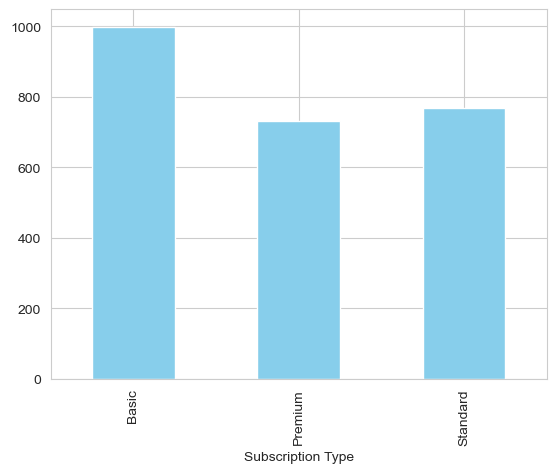

In [89]:
user_typeCount_df.plot(kind = 'bar', color='skyblue')

In [91]:
user_typeMR_df = netflix_users_df.groupby('Subscription Type')['Monthly Revenue'].sum()
user_typeMR_df

Subscription Type
Basic       12469
Premium      9229
Standard     9573
Name: Monthly Revenue, dtype: int64

**Checking for outliers**

<Axes: xlabel='Monthly Revenue'>

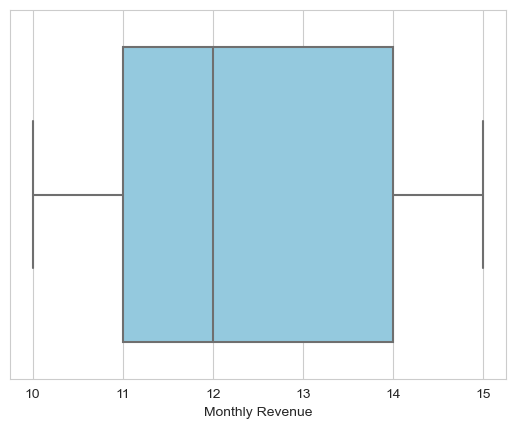

In [168]:
sns.boxplot(x=netflix_users_df['Monthly Revenue'], color='skyblue')

**so no outliers exists, let's move forward**

<Axes: xlabel='Subscription Type'>

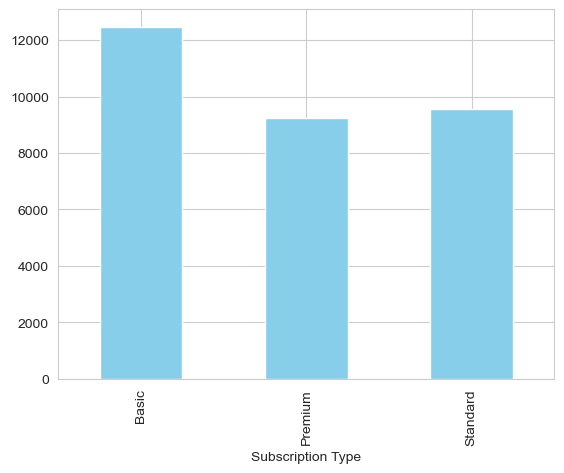

In [93]:
user_typeMR_df.plot(kind = 'bar', color='skyblue')

In [95]:
user_countryCount_df = netflix_users_df.groupby('Country')['Monthly Revenue'].count()
user_countryCount_df

Country
Australia         183
Brazil            183
Canada            317
France            183
Germany           183
Italy             183
Mexico            183
Spain             451
United Kingdom    183
United States     451
Name: Monthly Revenue, dtype: int64

<Axes: xlabel='Country'>

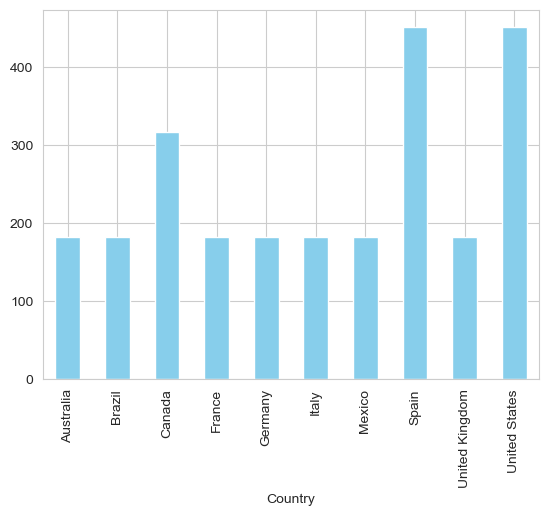

In [97]:
user_countryCount_df.plot(kind = 'bar', color='skyblue')

In [376]:
netflix_usersDevCount_df = netflix_users_df.groupby('Device')['Join Date'].count()
netflix_usersDevCount_df

Device
Laptop        636
Smart TV      610
Smartphone    621
Tablet        633
Name: Join Date, dtype: int64

In [405]:
netflix_usersPlanDuration_df = netflix_users_df.groupby('Plan Duration')['Join Date'].count()

netflix_usersPlanDuration_df

Plan Duration
1 Month    2500
Name: Join Date, dtype: int64

### This year User Analysis {latest]

In [388]:
filtered_users_df = netflix_users_df[(netflix_users_df['Join Date'] >= '2022-01-01') & (netflix_users_df['Join Date'] <= '2023-01-01')]

**Sliced the  data for 2022:2023**

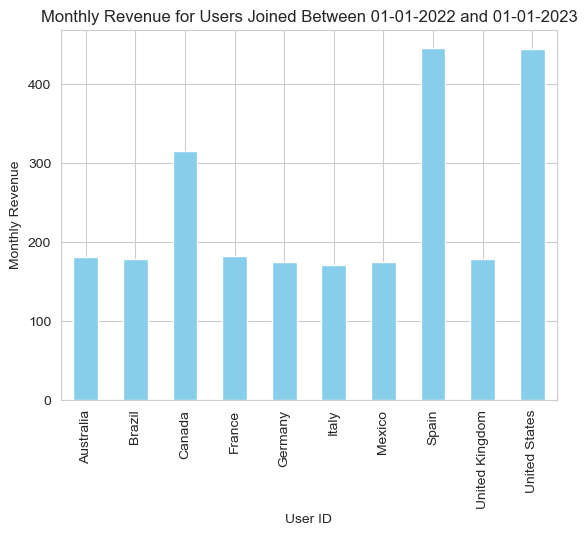

In [390]:
filtered_country_df = filtered_users_df.groupby('Country')['Monthly Revenue'].count()
# Plot the 'Monthly Revenue' of the filtered data
filtered_country_df.plot(kind='bar', title='Monthly Revenue for Users Joined Between 01-01-2022 and 01-01-2023', color='skyblue')
plt.xlabel('User ID')
plt.ylabel('Monthly Revenue')
plt.show()

In [322]:
filtered_users_df = filtered_users_df.copy()


In [335]:
filtered_users_df['month_join'] = filtered_users_df['Join Date'].dt.month


In [345]:
filtered_users_df['month_till_next_pay'] = filtered_users_df['Last Payment Date'].dt.month

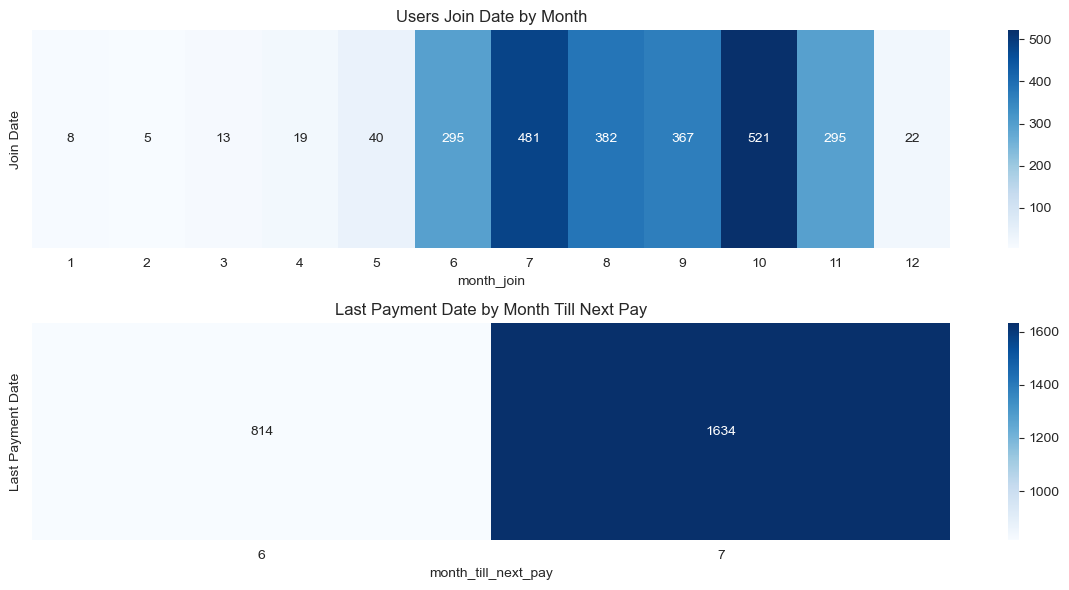

In [371]:
fig, ax = plt.subplots(nrows=2, figsize=(12, 6))

# Group and pivot the data for the first heatmap (Join Date by month)
filtered_usersMonthlyJoin_df = filtered_users_df.groupby('month_join')['Join Date'].count().reset_index()
filtered_usersMonthlyJoin_pivot_df = filtered_usersMonthlyJoin_df.set_index('month_join').T

# Plot the first heatmap
sns.heatmap(filtered_usersMonthlyJoin_pivot_df, ax=ax[0], annot=True, fmt='d', cmap='Blues')
ax[0].set_title('Users Join Date by Month')

# Group and pivot the data for the second heatmap (Last Payment Date by month till next pay)
filtered_usersMonthlyLP_df = filtered_users_df.groupby('month_till_next_pay')['Last Payment Date'].count().reset_index()
filtered_usersMonthlyLP_pivot_df = filtered_usersMonthlyLP_df.set_index('month_till_next_pay').T

# Plot the second heatmap
sns.heatmap(filtered_usersMonthlyLP_pivot_df, ax=ax[1], annot=True, fmt='d', cmap='Blues')
ax[1].set_title('Last Payment Date by Month Till Next Pay')

# Display the plot
plt.tight_layout()
plt.show()

In [378]:
filtered_usersDevCount_df = filtered_users_df.groupby('Device')['Join Date'].count()

Text(0.5, 1.0, 'Users Using Devices to Watch NEtflix')

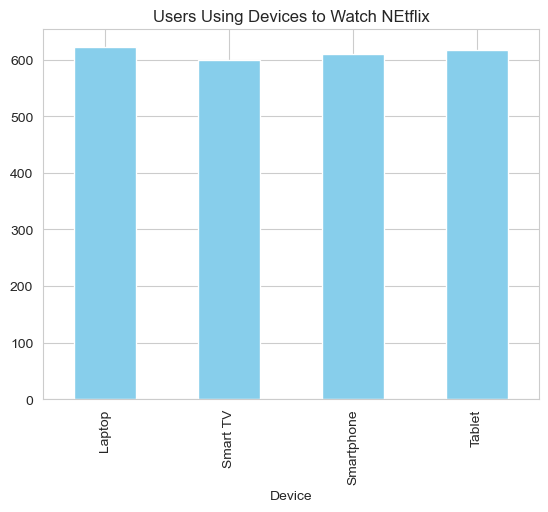

In [386]:
filtered_usersDevCount_df.plot(kind='bar', color='skyblue')
plt.title('Users Using Devices to Watch NEtflix')

# Netflix Data Analysis

## Introduction

In this analysis, we explore two datasets related to Netflix to extract meaningful insights. The datasets analyzed are:
1. **Netflix Userbase**
2. **Netflix Movies**

---
![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)

## 1. Netflix Userbase Analysis

### Demographics and Subscription Details

- **Age Distribution**:
  - The age distribution of Netflix users reveals which age brackets are most represented. This can help tailor content and marketing strategies to target these specific groups.

- **Geographical Distribution**:
  - Users are distributed across various countries, with some regions contributing more significantly to the subscriber base and revenue. This segmentation allows Netflix to understand regional preferences and adjust its offerings accordingly.

### Subscription Trends

- **Monthly Revenue Analysis**:
  - We filtered the user data for those who joined between January 2022 and January 2023. Analyzing the monthly revenue from these new users helps identify seasonal trends in sign-ups and their impact on overall revenue.

- **Churn Analysis**:
  - By examining the last payment dates and correlating them with user activity, we can identify patterns in user churn. This analysis is crucial for developing strategies to reduce churn rates and improve retention.

### Device Usage

- **Device Popularity**:
  - The analysis shows which devices are most popular among Netflix users (e.g., mobile, tablet, desktop, smart TVs). Understanding device preferences is essential for optimizing the viewing experience across different platforms.

---
![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)

## 2. Netflix Movies Analysis

### Content Library Overview

- **Genre Popularity**:
  - The breakdown of Netflix’s content library by genre helps identify the most popular genres among users. This insight is valuable for content acquisition and production decisions to keep the library appealing to a broad audience.

- **Ratings and Reviews**:
  - Analyzing the distribution of ratings across different titles provides insights into user satisfaction. High-rated content can be promoted more heavily, while low-rated content can be evaluated for improvement or removal.

### Trends Over Time

- **Release Date Analysis**:
  - By examining the release dates of titles, we can identify trends in how frequently new content is added to Netflix. This analysis can also show how the frequency of new releases correlates with user engagement.

- **Content Longevity**:
  - Some content remains popular long after its release, while others quickly lose viewership. Analyzing content longevity helps understand what keeps certain shows or movies popular over time.

### Content Performance

- **Top-Performing Titles**:
  - Identifying the top-performing titles in terms of viewership and ratings offers insights into the types of content that resonate most with the audience. These titles can serve as benchmarks for future content strategies.

- **Underperforming Content**:
  - Analyzing underperforming titles helps Netflix avoid similar content pitfalls in the future. Understanding why certain content fails to attract viewers is crucial for refining content strategies.

---
![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)

## Conclusion

The comprehensive analysis of the Netflix Userbase and Titles datasets reveals critical insights that can inform Netflix's business strategies:
- **Enhance User Retention**:
  - By understanding churn patterns and device usage, Netflix can develop strategies to keep users engaged and improve retention rates.
  
- **Optimize Content Offerings**:
  - Detailed analysis of genre trends and content ratings can guide Netflix in acquiring or producing content that aligns with viewer preferences.

- **Drive Revenue Growth**:
  - Identifying revenue patterns and seasonal trends helps Netflix time its marketing efforts and promotions effectively, maximizing revenue potential.

This analysis underscores the importance of data-driven decision-making in optimizing both user experience and content strategy for sustained growth.
